START NOTEBOOK

## Set-up 

In [1]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

import mpld3
mpld3.enable_notebook()


from mpld3 import plugins

# Plot graphs within this document
%matplotlib inline

# Plot graphs outside (for interaction)
# %matplotlib

from pestmob import *
from mixinglayer import *

### Microcosm

In [2]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
zl = soil_height1 = 20  # Mixing layer depth in mm

### Soil - Hydrological Characteristics

In [3]:
''' Hydrological controlling parameters'''
# Alteck (Martine Trautmann, sampled pre-event)
porosity_crop = 0.61  # Crop soil
kSat_crop = 2.24  # mm/min (13.45 cm/h - Crop Soil) 
kSat_crop2 = kSat_crop/100 
# ov_1 = 0.20   # Initial water content m3. m-3
ovSat_crop = 0.61  # Saturated water content (assumed)
psi_crop = 1100  # soil suction Alteck (mm)
psi_crop2 = 617.0  # soil suction Alteck (mm)
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)

# Results

## Hydrology - 1st pulse

##### Observed percolation

In [4]:
# all at 6 min, high inetnesity
leach_high_6min = np.array([16.253, 12.958, 17.536, 14.29])  

# all at 12 min, med intensity
leach_med_12min = np.array([10.089, 5.902, 13.981, 10.602]) 

# all at 30min, med intensity
leach_med_30min = np.array([49.197, 40.402, 45.772, 47.201])  

# all at 30min, low intensity
leach_low_30min = np.array([20.037, 17.508, 22.376, 20.085])  

#### Computation

In [5]:
water_data = leachsim(kSat = kSat_crop,
                      soil_height=soil_height1,
                      soil = 'Alteck',
                      psi=psi_crop)

Mass balance True
Mass balance 0.0
Mass balance 0.0


In [6]:
# Time
cum_time_30min = water_data[:, 0]

# Cummulative infiltration
cum_inf_135mmh = water_data[:, 4]
cum_inf_55mmh = water_data[:, 5] 
cum_inf_30mmh = water_data[:, 6] 

# Cummulative leaching
cum_leach_135mmh = water_data[:, 7]
cum_leach_55mmh = water_data[:, 8]
cum_leach_30mmh = water_data[:, 9]

# Ponding
roff_135mmh = water_data[:, 10]
roff_55mmh = water_data[:, 11]
roff_30mmh = water_data[:, 12]

# Cummulative ponding
cum_roff_135mmh = water_data[:, 13]
cum_roff_55mmh = water_data[:, 14]
cum_roff_30mmh = water_data[:, 15]

infil_135mmh = water_data[:, 16]
infil_55mmh = water_data[:, 17]
infil_30mmh = water_data[:, 18]

percol_data1 = stackdata3(cum_time_30min,
                          cum_leach_135mmh, cum_leach_55mmh, cum_leach_30mmh)

runoff_data1 = stackdata3(cum_time_30min,
                          cum_roff_135mmh, cum_roff_55mmh, cum_roff_30mmh)

infil_data1 = stackdata3(cum_time_30min,
                         infil_135mmh, infil_55mmh, infil_30mmh)

time_size_135mmh = water_data[:, 19]
time_size_55mmhA = water_data[:, 20]
time_size_55mmhB = water_data[:, 20]
time_size_30mmh = water_data[:, 21]

time_sizes1 = [time_size_135mmh, time_size_135mmh,
               time_size_55mmhA, time_size_55mmhA,
               time_size_55mmhB, time_size_55mmhB,
               time_size_30mmh, time_size_30mmh]


In [7]:
#hydroplot(percol_data1, 
#          "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h",
#          leach_high_6min, 
#          leach_med_12min, leach_med_30min, 
#          leach_low_30min,
#          "Leached Volume [mL] - Crop Soil 1st Pulse")

## Transport - 1st pulse

** Initial and observed mass in leachate and ponding **

In [8]:
#  Dictionary contains:
#  Scenario: (initial_mass, leached_mass_observed, ponded_mass_obs)
cuCr_dict_S_1st = {
    'a_high_0d': (1184.44, 8.6, 'nan', 59, 0.4, 'nan'),
    'b_high_1d': (1177.45, 14.0, 'nan', 59, 0.7, 'nan'),
    'c_med12_0d': (1184.44, 9.2, 'nan' , 59, 0.5, 'nan'),
    'd_med12_1d': (1177.45, 14.0, 'nan', 59, 0.7, 'nan'),
    'e_med30_0d': (1184.44, 335.6, 'nan', 59, 16.8, 'nan'),
    'f_med30_1d': (1177.45, 278.0, 'nan', 59, 13.9, 'nan'),
    'g_low_0d': (1184.44, 20.5, 'nan', 59, 1.0, 'nan'),
    'h_low_1d': (1177.45, 21.6, 'nan', 59, 1.1, 'nan')
}

cuCr_dict_L_1st = {
    'a_high_0d': (1626.66, 0.7, 'nan', 81, 0.03, 'nan'),
    'b_high_1d': (1106.95, 'nan', 'nan', 55, 'nan', 'nan'),
    'c_med12_0d': (1626.66, 0.4, 'nan', 81, 0.02, 'nan'),
    'd_med12_1d': (1106.95, 'nan', 'nan', 55, 0.02, 'nan'),
    'e_med30_0d': (1626.66, 40.0, 'nan', 81, 2.0, 'nan'),
    'f_med30_1d': (1106.95, 'nan', 'nan', 55, 1.7, 'nan'),
    'g_low_0d': (1626.66, 1.5, 'nan', 81, 0.07, 'nan'),
    'h_low_1d': (1106.95, 'nan', 'nan', 55, 0.04, 'nan')
}

### Soil - Transport Charachteristics

In [9]:
# Soil characteristics

# Initial bulk density options:
# pb_crop_i = 0.1/10**3  # bulk density (g/cm^3) -> g/mm^3  (FAKE TEST)

# pb_crop_i1 = 0.99/10**3  # bulk density (g/cm^3) -> g/mm^3  (M. Trautmann)
pb_crop_i1 = 2.61/10**3 # inital 1st pulse, calc. from experiment cond.
pb_crop_i2 = 3.59/10**3 # initial 2nd pulse, calc. from experiment cond.

# Final bulk density options (1st and 2nd pulses)
pb_crop_f1 = 3.59/10**3 # final1, calculated from experimental conditions.
# pb_crop_f1 = 13.59/10**3 # final1, TEST
pb_crop_f2 = 3.76/10**3 # final2, calculated from experimental conditions.
# pb_crop_f2 = 13.76/10**3 # final2, TEST

porosity_crop = 0.61  # Crop soil

# Assumed (used to calculate Reynolds number)
runoff_vel = 20.0  # mm/min

# Fraction organic matter and carbon (Scenario 1)
fom_crop_sterile = 3.87/100.0
fom_crop_untreat = 5.51/100.0
foc_crop_sterile = 0.58*fom_crop_sterile
foc_crop_untreat = 0.58*fom_crop_untreat

# Soil characteristics (OC Black & Walkley - Scenario 2)
# foc_crop_untreat2 = 2.04/100
# foc_crop_sterile2 = 0.70*foc_crop_untreat2

### Cupper Properties

In [10]:
# Kd (Copper). Allison and Allison, 2005 - EPA/600/R-05/074: 
# log(Kd) range: 0.1 - 7.0, max-mean = 5.5

Kd_copper1 = 10**0.1  # [mL/g] = [L/Kg] 
Kd_copper2 = 10**0.5  # [mL/g] = [L/Kg] 
Kd_copper3 = 10**0.6  # [mL/g] = [L/Kg] 
Kd_copper4 = 10**1.7  # [mL/g] = [L/Kg] 
Kd_copper5 = 10**2.7  # [mL/g] = [L/Kg]

Kd_copper = [Kd_copper1, Kd_copper2, Kd_copper3, Kd_copper4, Kd_copper5]
Kd_cupper = np.array(Kd_copper)*10**3

In [11]:
# kdmx_array = np.asarray(Kd_smeto_sterile)
# np.log10(kdmx_array)

### Computation transport - 1st pulse

In [12]:
# Any length unit input must be: "mm"
pest_sterile_1st = pest_test3(
    Kd_cupper,
    cuCr_dict_S_1st,          
    pb_crop_i1, pb_crop_f1,
    ovSat_crop,
    percol_data1, percol_data1,
    runoff_data1, runoff_data1, 
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    KFILM = True,
    first_cycle = True,
    living = False)

1st Pulse
Sterile
--------------------------------------------
Koc tested:  [    56.08684896    140.88379489    177.3621895    2232.85767454
  22328.5767454 ]
Best log Kd:  0.5 cm3/g ( Num:  2 ) 
 R2:  0.563157613822
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  6.78796037067 | 9.18376459188 | 8.6
(A) 135 mm/h - Aged  -34.7888114775 | 9.12956639315 | 14.0
(B) 55 mm/h - Fresh  -30.8797713374 | 6.35906103696 | 9.2
(B) 55 mm/h - Aged  -54.8461936324 | 6.32153289146 | 14.0
(C) 55 mm/h - Fresh  -57.6941830651 | 141.978321633 | 335.6
(C) 55 mm/h - Aged  -49.2300599672 | 141.140433291 | 278.0
(D) 30 mm/h - Fresh  72.6956730409 | 390.977512989 | 20.5
(D) 30 mm/h - Aged  62.9337205358 | 388.670150172 | 21.6


In [13]:
# Any length unit input must be: "mm"
pest_living_1st = pest_test3(
    Kd_cupper,
    cuCr_dict_L_1st,          
    pb_crop_i1, pb_crop_f1,
    ovSat_crop,
    percol_data1, percol_data1,
    runoff_data1, runoff_data1, 
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    KFILM = True,
    first_cycle = True,
    living = True)

1st Pulse
Living
--------------------------------------------
Koc tested:  [    39.39312259     98.95105013    124.57199154   1568.26845744
  15682.68457436]
Best log Kd:  1.7 cm3/g ( Num:  4 ) 
 R2:  0.0489057153166
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -91.824827832 | 0.0572262051762 | 0.7
(A) 135 mm/h - Aged  No obs | < LD  | 0.0389427094905 | nan
(B) 55 mm/h - Fresh  -90.2402446442 | 0.0390390214233 | 0.4
(B) 55 mm/h - Aged  No obs | < LD  | 0.0265662429546 | nan
(C) 55 mm/h - Fresh  -97.5427393272 | 0.982904269131 | 40.0
(C) 55 mm/h - Aged  No obs | < LD  | 0.668871110567 | nan
(D) 30 mm/h - Fresh  -85.1617720134 | 3.54833966302 | 1.5
(D) 30 mm/h - Aged  No obs | < LD  | 2.41466230803 | nan


#### Sterile time series

In [14]:
# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_sterile_1st[:, 1]
high_1d_cum_mass_out_dt = pest_sterile_1st[:, 2]

med12_0d_cum_mass_out_dt = pest_sterile_1st[:, 3]
med12_1d_cum_mass_out_dt = pest_sterile_1st[:, 4]

med30_0d_cum_mass_out_dt = pest_sterile_1st[:, 5]
med30_1d_cum_mass_out_dt = pest_sterile_1st[:, 6]

low_0d_cum_mass_out_dt = pest_sterile_1st[:, 7]
low_1d_cum_mass_out_dt = pest_sterile_1st[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_sterile_1st[:, 9]
high_1d_overmass_dt = pest_sterile_1st[:, 10]
med12_0d_overmass_dt = pest_sterile_1st[:, 11]
med12_1d_overmass_dt = pest_sterile_1st[:, 12]

med30_0d_overmass_dt = pest_sterile_1st[:, 13]
med30_1d_overmass_dt = pest_sterile_1st[:, 14]
low_0d_overmass_dt = pest_sterile_1st[:, 15]
low_1d_overmass_dt = pest_sterile_1st[:, 16]


mass_percol_sterile1 = stackdata8(cum_time_30min,
                          high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
                          med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
                          med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
                          low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_sterile1 = stackdata8(cum_time_30min,
                          high_0d_overmass_dt, high_1d_overmass_dt,
                          med12_0d_overmass_dt, med12_1d_overmass_dt,
                          med30_0d_overmass_dt, med30_1d_overmass_dt,
                          low_0d_overmass_dt, low_1d_overmass_dt)

#### Living time series

In [15]:
# Cumulative leachate
high_0d_cum_mass_out_dt = pest_living_1st[:, 1]
high_1d_cum_mass_out_dt = pest_living_1st[:, 2]

med12_0d_cum_mass_out_dt = pest_living_1st[:, 3]
med12_1d_cum_mass_out_dt = pest_living_1st[:, 4]

med30_0d_cum_mass_out_dt = pest_living_1st[:, 5]
med30_1d_cum_mass_out_dt = pest_living_1st[:, 6]

low_0d_cum_mass_out_dt = pest_living_1st[:, 7]
low_1d_cum_mass_out_dt = pest_living_1st[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_living_1st[:, 9]
high_1d_overmass_dt = pest_living_1st[:, 10]
med12_0d_overmass_dt = pest_living_1st[:, 11]
med12_1d_overmass_dt = pest_living_1st[:, 12]

med30_0d_overmass_dt = pest_living_1st[:, 13]
med30_1d_overmass_dt = pest_living_1st[:, 14]
low_0d_overmass_dt = pest_living_1st[:, 15]
low_1d_overmass_dt = pest_living_1st[:, 16]


mass_percol_living1 = stackdata8(cum_time_30min,
                          high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
                          med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
                          med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
                          low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_living1 = stackdata8(cum_time_30min,
                          high_0d_overmass_dt, high_1d_overmass_dt,
                          med12_0d_overmass_dt, med12_1d_overmass_dt,
                          med30_0d_overmass_dt, med30_1d_overmass_dt,
                          low_0d_overmass_dt, low_1d_overmass_dt)

## Plotting transport - Cupper

### Sterile (1st Pulse, Crop Soil)

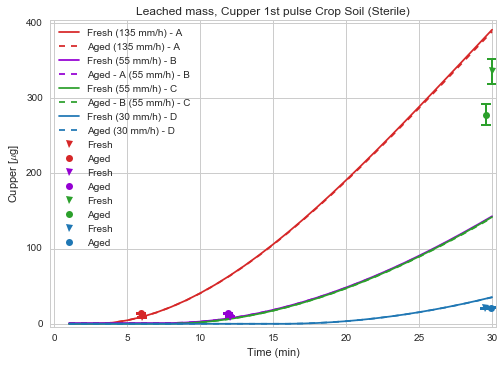

In [16]:
pestiplot_condition(
    mass_percol_sterile1,
    cuCr_dict_S_1st,
    'Cupper',
    soil_type='Crop Soil',
    cycle = '1st pulse',
    LEACH = True,
    STERILE = True
)

### Living (1st Pulse, Crop Soil)

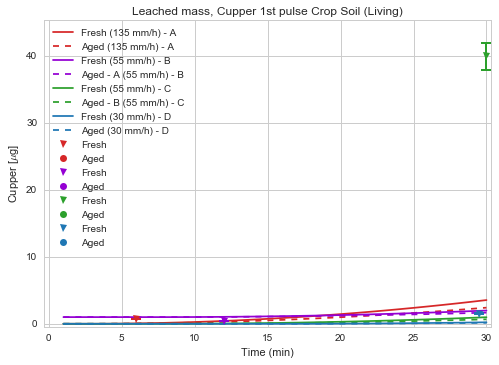

In [17]:
pestiplot_condition(
    mass_percol_living1,
    cuCr_dict_L_1st,
    'Cupper',
    soil_type='Crop Soil',
    cycle = '1st pulse',
    LEACH = True,
    STERILE = False
)

# Hydrology - 2nd pulse

In [18]:
''' Hydrological controlling parameters'''
ov_2 = ovSat_crop - 0.038  # Initial water content m3. m-3
psi_crop = 1100  # soil suction Alteck mm
psi_cropB = 617  # soil suction Alteck mm
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)
soil_height2 = 20  # mm

**Observed Percolation - 2nd pulse**

In [19]:
# Order if array is:
#  [sterile, untreat, sterile_aged, untreat_aged]

# At 6 min, high inetnesity
leach_high_6min = np.array([14.192, 8.245, 2.410, 5.469]) 

# At 12 min, med intensity
leach_med_12min = np.array([18.672, 19.0, 0.830, 11.407]) 

# At 30min, med intensity
leach_med_30min = np.array([12.697, 2.473, 3.52, 20.291])  

# At 30min, low intensity
leach_low_30min = np.array([29.656, 9.375, 0.409, 3.385]) 

**Observed Ponding - 2nd pulse**

In [20]:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
roff_high_6min = np.array([10.824, 20.935, 24.75, 19.041])  

# all at 12 min, med intensity
roff_med_12min = np.array([0, 3.907, 19.436, 7.313]) 

# all at 30min, med intensity
roff_med_30min = np.array([43.764, 28.911, 51.964, 33.478])  

# all at 30min, low intensity
roff_low_30min = np.array([0, 22.618, 28.598, 27.314])  

### Inverse Ksat determination 

Based on hisotric rainfall pattern, fresh and aged.

In [21]:
water2_ktest_fresh = leachsim2(
    leach_high_6min, 
    leach_med_12min, leach_med_30min, 
    leach_low_30min,
    kSat = [kSat_crop/25, kSat_crop/50, kSat_crop/100, 
            kSat_crop/125, kSat_crop/150, kSat_crop/175, 
            kSat_crop/200, kSat_crop/250],
    soil_height=soil_height2,
    soil = 'Alteck',
    dtGA = 1,
    AGED = False
)

FRESH
--------------------------------------------
ksat high:  0.26880000000000004 cm/h
ksat med12:  0.5376000000000001 cm/h
ksat med30:  0.05376 cm/h
ksat low:  0.26880000000000004 cm/h
--------------------------------------------
R2:  0.731113260331
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -1.31697973948
55 mm/h - 12min  2.1485605593
55 mm/h - 30min  112.550174466
30 mm/h - 30min  51.4046884511
--------------------------------------------
Mass balance:  True True True True


In [22]:
water2_ktest_aged = leachsim2(
    leach_high_6min, 
    leach_med_12min, leach_med_30min, 
    leach_low_30min,
    kSat = [kSat_crop/50, kSat_crop/100, kSat_crop/125, 
            kSat_crop/150, kSat_crop/175, kSat_crop/200, 
            kSat_crop/250, kSat_crop/700, kSat_crop/1000],
    soil_height=soil_height2,
    soil = 'Alteck',
    dtGA = 1,
    AGED = True
)

AGED
--------------------------------------------
ksat high:  0.05376 cm/h
ksat med12:  0.06720000000000001 cm/h
ksat med30:  0.06720000000000001 cm/h
ksat low:  0.01344 cm/h
--------------------------------------------
R2:  0.800359441604
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  36.6548875886
55 mm/h - 12min  367.391227272
55 mm/h - 30min  94.9388863921
30 mm/h - 30min  389.024260708
--------------------------------------------
Mass balance:  True True True True


#### Time series fresh

In [23]:
# Time axis
cum_time_30min = water2_ktest_fresh[:, 0]

# Cumulative leachate
cum_leach_135mmh = water2_ktest_fresh[:, 9]
cum_leach_55mmhA = water2_ktest_fresh[:, 10]
cum_leach_55mmhB = water2_ktest_fresh[:, 11]
cum_leach_30mmh = water2_ktest_fresh[:, 12]

# Group each compartment for graphing
percol_data2_fresh = stackdata4(
    cum_time_30min,
    cum_leach_135mmh, 
    cum_leach_55mmhA, cum_leach_55mmhB, 
    cum_leach_30mmh)

# Ponding fresh
roff_135mmh = water2_ktest_fresh[:, 13]
roff_55mmhA = water2_ktest_fresh[:, 14]
roff_55mmhB = water2_ktest_fresh[:, 15]
roff_30mmh = water2_ktest_fresh[:, 16]

# Cummulative ponding
cum_roff_135mmh = water2_ktest_fresh[:, 17]
cum_roff_55mmhA = water2_ktest_fresh[:, 18]
cum_roff_55mmhB = water2_ktest_fresh[:, 19]
cum_roff_30mmh = water2_ktest_fresh[:, 20]


runoff_data2_fresh = stackdata4(
    cum_time_30min,
    cum_roff_135mmh, 
    cum_roff_55mmhA, cum_roff_55mmhB, 
    cum_roff_30mmh)


time_size_135mmh = water2_ktest_fresh[:, 25]
time_size_55mmhA = water2_ktest_fresh[:, 26]
time_size_55mmhB = water2_ktest_fresh[:, 27]
time_size_30mmh = water2_ktest_fresh[:, 28]

time_sizes2 = [time_size_135mmh, 
               time_size_55mmhA, time_size_55mmhB, 
               time_size_30mmh]

#### Time series aged

In [24]:
# Time axis
cum_time_30min = water2_ktest_aged[:, 0]

# Cumulative leachate
cum_leach_135mmh = water2_ktest_aged[:, 9]
cum_leach_55mmhA = water2_ktest_aged[:, 10]
cum_leach_55mmhB = water2_ktest_aged[:, 11]
cum_leach_30mmh = water2_ktest_aged[:, 12]

# Group each compartment for graphing
percol_data2_aged = stackdata4(
    cum_time_30min,
    cum_leach_135mmh, 
    cum_leach_55mmhA, cum_leach_55mmhB, 
    cum_leach_30mmh)

# Ponding Aged
roff_135mmh = water2_ktest_aged[:, 13]
roff_55mmhA = water2_ktest_aged[:, 14]
roff_55mmhB = water2_ktest_aged[:, 15]
roff_30mmh = water2_ktest_aged[:, 16]

# Cummulative ponding
cum_roff_135mmh = water2_ktest_aged[:, 17]
cum_roff_55mmhA = water2_ktest_aged[:, 18]
cum_roff_55mmhB = water2_ktest_aged[:, 19]
cum_roff_30mmh = water2_ktest_aged[:, 20]


runoff_data2_aged = stackdata4(
    cum_time_30min,
    cum_roff_135mmh, 
    cum_roff_55mmhA, cum_roff_55mmhB, 
    cum_roff_30mmh)


time_size_135mmh = water2_ktest_aged[:, 25]
time_size_55mmhA = water2_ktest_aged[:, 26]
time_size_55mmhB = water2_ktest_aged[:, 27]
time_size_30mmh = water2_ktest_aged[:, 28]

time_sizes2 = [time_size_135mmh, time_size_135mmh, 
               time_size_55mmhA, time_size_55mmhA, 
               time_size_55mmhB, time_size_55mmhB, 
               time_size_30mmh, time_size_30mmh]

### Percolation & ponding - 2nd pulse (fresh soil)

In [25]:
#hydroplot2(percol_data2_fresh, 
#          "Leached, 135mm/h", "Leached, 55mm/h - A", "Leached, 55mm/h - B", "Leached, 30mm/h",
#          leach_high_6min, 
#          leach_med_12min, leach_med_30min, 
#          leach_low_30min,
#         "Leached Volume [mL] - Crop Soil 2nd Pulse",
#          AGED = False)

In [26]:
#hydroplot2(runoff_data2_fresh, 
#          "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
#          roff_high_6min, roff_med_12min, roff_med_30min, roff_low_30min,
#         "Ponded Volume [mL] - Crop Soil 2nd Pulse",
#          AGED = False)

### Percolation & ponding - 2nd pulse (aged soil)

In [27]:
#hydroplot2(percol_data2_aged, 
#          "Leached, 135mm/h - A", 
#           "Leached, 55mm/h - B", "Leached, 55mm/h - C", 
#           "Leached, 30mm/h - D",
#          leach_high_6min, 
#           leach_med_12min, leach_med_30min, 
#           leach_low_30min,
#         "Leached Volume [mL] - Crop Soil 2nd Pulse",
#          AGED = True)

In [28]:
#hydroplot2(runoff_data2_aged, 
#          "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
#          roff_high_6min, roff_med_12min, roff_med_30min, roff_low_30min,
#         "Ponded Volume [mL] - Crop Soil 2nd Pulse",
#          AGED = True)

## Transport - 2nd pulse

** Initial and observed mass in leachate and ponding **

In [29]:
#  Dictionary contains:
#  Scenario: (initial_mass, leached_mass_observed, ponded_mass_obs)

cuCr_dict_S_2nd = {
    'a_high_0d': (1175.8, 4.85, 'nan', 60, 0.24, 'nan'),
    'b_high_1d': (1163.5, 0.74, 'nan', 59, 0.04, 'nan'),
    'c_med12_0d': (1175.2, 6.42, 'nan', 60, 0.32, 'nan'),
    'd_med12_1d': (1163.4, 'nan', 'nan', 59, 'nan', 'nan'),
    'e_med30_0d': (848.9, 4.84, 1.64, 76, 0.24, 0.08),
    'f_med30_1d': (899.4, 0.94, 4.86, 72, 0.05, 0.24),
    'g_low_0d': (1163.9, 8.61, 'nan', 60, 0.43, 'nan'),
    'h_low_1d': (1155.8, 'nan', 'nan', 60, 'nan', 'nan')
}

cuCr_dict_L_2nd = {
    'a_high_0d': (1626.0, 0.59, 'nan', 81.4, 0.3, 'nan'),
    'b_high_1d': (1106.5, 'nan', 'nan', 55.4, 'nan', 'nan'),
    'c_med12_0d': (1626.3, 1.09, 'nan', 81.4, 0.05, 'nan'),
    'd_med12_1d': (1106.5,  'nan', 'nan', 55.4, 'nan', 'nan'),
    'e_med30_0d': (1586.7, 'nan', 'nan', 81.4, 'nan', 'nan'),
    'f_med30_1d': (1072.9, 'nan', 'nan', 55.4, 'nan', 'nan'),
    'g_low_0d': (1625.2, 0.76, 'nan', 81.4, 0.04, 'nan'),
    'h_low_1d': (1106.1, 'nan', 'nan', 55.4, 'nan', 'nan')
}


#### Change in organic matter characterisitics

In [30]:
# ignored...

### Computation transport - 2nd Pulse

#### Kd optimal (sterile)

In [31]:

pest_sterile_2nd = pest_test3(
    Kd_cupper,
    cuCr_dict_S_2nd,
    pb_crop_i2, pb_crop_f2,
    ovSat_crop,
    percol_data2_fresh, runoff_data2_fresh,
    percol_data2_aged, runoff_data2_aged, 
    time_sizes2,
    area, soil_height2,
    d, runoff_vel,
    first_cycle = False,
    living = False)


2nd Pulse
Sterile
--------------------------------------------
Koc tested:  [    56.08684896    140.88379489    177.3621895    2232.85767454
  22328.5767454 ]
Best log Kd:  1.7 cm3/g ( Num:  4 ) 
 R2:  -0.733533993125
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -98.7244447812 | 0.0618644281132 | 4.85
(A) 135 mm/h - Aged  -89.7811429445 | 0.075619542211 | 0.74
(B) 55 mm/h - Fresh  -97.0078826726 | 0.19209393242 | 6.42
(B) 55 mm/h - Aged  No obs | < LD  | 0.0175059736085 | nan
(C) 55 mm/h - Fresh  -96.6456727366 | 0.162349439548 | 4.84
(C) 55 mm/h - Aged  -22.3166623626 | 0.362184346948 | 0.94
(D) 30 mm/h - Fresh  -94.000597192 | 0.677121418823 | 8.61
(D) 30 mm/h - Aged  No obs | < LD  | 2.32535316695 | nan


#### Kd optimal (living)

In [32]:

pest_living_2nd = pest_test3(
    Kd_cupper,
    cuCr_dict_L_2nd,
    pb_crop_i2, pb_crop_f2,
    ovSat_crop,
    percol_data2_fresh, runoff_data2_fresh,
    percol_data2_aged, runoff_data2_aged, 
    time_sizes2,
    area, soil_height2,
    d, runoff_vel,
    first_cycle = False,
    living = True)


2nd Pulse
Living
--------------------------------------------
Koc tested:  [    39.39312259     98.95105013    124.57199154   1568.26845744
  15682.68457436]
Best log Kd:  1.7 cm3/g ( Num:  4 ) 
 R2:  0.727880802476
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -85.4997304234 | 0.0855515905019 | 0.59
(A) 135 mm/h - Aged  No obs | < LD  | 0.0719149320641 | nan
(B) 55 mm/h - Fresh  -75.612008864 | 0.265829103382 | 1.09
(B) 55 mm/h - Aged  No obs | < LD  | 0.0166497849388 | nan
(C) 55 mm/h - Fresh  No obs | < LD  | 0.303451355555 | nan
(C) 55 mm/h - Aged  No obs | < LD  | 0.34447050017 | nan
(D) 30 mm/h - Fresh  -5.0950801651 | 0.936383251409 | 0.76
(D) 30 mm/h - Aged  No obs | < LD  | 2.21143384549 | nan


#### Sterile time series

In [33]:
# Time axis
cum_time_30min = pest_sterile_2nd[:, 0]

# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_sterile_2nd[:, 1]
high_1d_cum_mass_out_dt = pest_sterile_2nd[:, 2]

med12_0d_cum_mass_out_dt = pest_sterile_2nd[:, 3]
med12_1d_cum_mass_out_dt = pest_sterile_2nd[:, 4]

med30_0d_cum_mass_out_dt = pest_sterile_2nd[:, 5]
med30_1d_cum_mass_out_dt = pest_sterile_2nd[:, 6]

low_0d_cum_mass_out_dt = pest_sterile_2nd[:, 7]
low_1d_cum_mass_out_dt = pest_sterile_2nd[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_sterile_2nd[:, 9]
high_1d_overmass_dt = pest_sterile_2nd[:, 10]
med12_0d_overmass_dt = pest_sterile_2nd[:, 11]
med12_1d_overmass_dt = pest_sterile_2nd[:, 12]

med30_0d_overmass_dt = pest_sterile_2nd[:, 13]
med30_1d_overmass_dt = pest_sterile_2nd[:, 14]
low_0d_overmass_dt = pest_sterile_2nd[:, 15]
low_1d_overmass_dt = pest_sterile_2nd[:, 16]

mass_percol_sterile2 = stackdata8(
    cum_time_30min,
    high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
    med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
    med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
    low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_sterile2 = stackdata8(
    cum_time_30min,
    high_0d_overmass_dt, high_1d_overmass_dt,
    med12_0d_overmass_dt, med12_1d_overmass_dt,
    med30_0d_overmass_dt, med30_1d_overmass_dt,
    low_0d_overmass_dt, low_1d_overmass_dt)


#### Living time series

In [34]:
# Time axis
cum_time_30min = pest_living_2nd[:, 0]

# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_living_2nd[:, 1]
high_1d_cum_mass_out_dt = pest_living_2nd[:, 2]

med12_0d_cum_mass_out_dt = pest_living_2nd[:, 3]
med12_1d_cum_mass_out_dt = pest_living_2nd[:, 4]

med30_0d_cum_mass_out_dt = pest_living_2nd[:, 5]
med30_1d_cum_mass_out_dt = pest_living_2nd[:, 6]

low_0d_cum_mass_out_dt = pest_living_2nd[:, 7]
low_1d_cum_mass_out_dt = pest_living_2nd[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_living_2nd[:, 9]
high_1d_overmass_dt = pest_living_2nd[:, 10]
med12_0d_overmass_dt = pest_living_2nd[:, 11]
med12_1d_overmass_dt = pest_living_2nd[:, 12]

med30_0d_overmass_dt = pest_living_2nd[:, 13]
med30_1d_overmass_dt = pest_living_2nd[:, 14]
low_0d_overmass_dt = pest_living_2nd[:, 15]
low_1d_overmass_dt = pest_living_2nd[:, 16]

mass_percol_living2 = stackdata8(
    cum_time_30min,
    high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt,
    med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt,
    med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
    low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_living2 = stackdata8(
    cum_time_30min,
    high_0d_overmass_dt, high_1d_overmass_dt,
    med12_0d_overmass_dt, med12_1d_overmass_dt,
    med30_0d_overmass_dt, med30_1d_overmass_dt,
    low_0d_overmass_dt, low_1d_overmass_dt)



## Plotting transport - Cupper

### Sterile (2nd Pulse, Crop Soil)

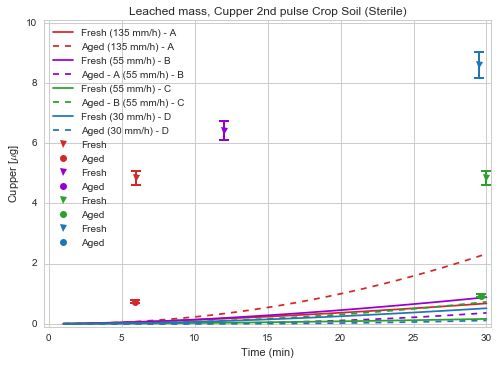

In [35]:
pestiplot_condition(
    mass_percol_sterile2,
    cuCr_dict_S_2nd,
    'Cupper',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = True
)

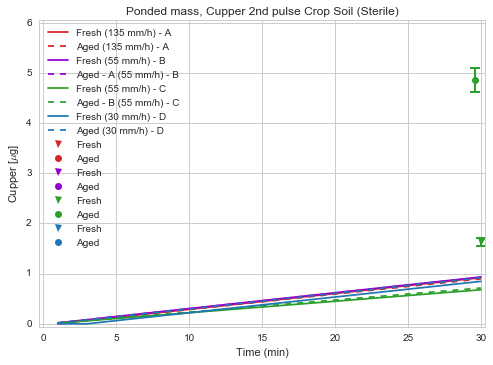

In [36]:
pestiplot_condition(
    mass_pond_sterile2,
    cuCr_dict_S_2nd,
    'Cupper',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = True
)

### Living (2nd Pulse, Crop Soil)

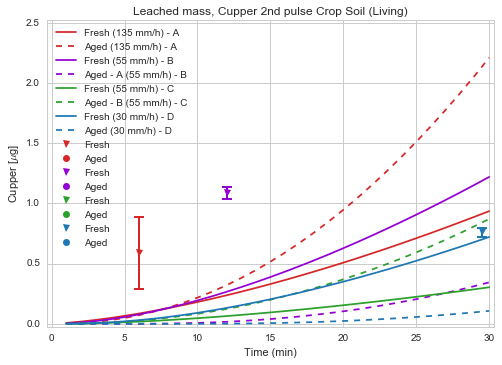

In [37]:
pestiplot_condition(
    mass_percol_living2,
    cuCr_dict_L_2nd,
    'Cupper',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = False
)

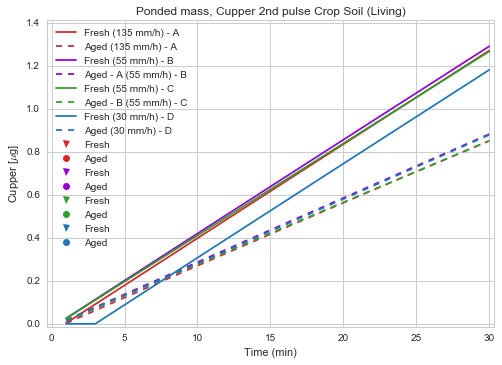

In [38]:
pestiplot_condition(
    mass_pond_living2,
    cuCr_dict_L_2nd,
    'Cupper',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = False
)

END NOTEBOOK